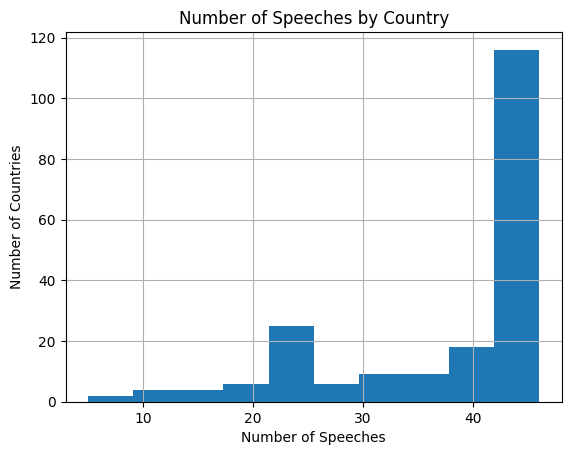

Countries who spoke the most at the UN:
country
SDN    46
PHL    46
URY    46
MEX    46
BLR    46
Name: count, dtype: int64
Countries who spoke the least at the UN:
country
TLS    13
KIR    13
MNE    10
EU      5
SSD     5
Name: count, dtype: int64


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('un-general-debates.csv')

# Drop NA values in the dataset
data = data.dropna()

# Get all the unique countries
countries = data['country'].unique()
# print(countries)

# How many times did each country speak at the UN?
country_counts = data['country'].value_counts()
# print(country_counts)

# Graph a histogram of the number of times each country spoke at the UN
country_counts.hist()
plt.xlabel('Number of Speeches')
plt.ylabel('Number of Countries')
plt.title('Number of Speeches by Country')
plt.show()

# Save the 5 countries who spoke the most at the UN
top_5_countries = country_counts.head(5)
print("Countries who spoke the most at the UN:")
print(top_5_countries)

# Save the 5 countries who spoke the least at the UN
bottom_5_countries = country_counts.tail(5)
print("Countries who spoke the least at the UN:")
print(bottom_5_countries)


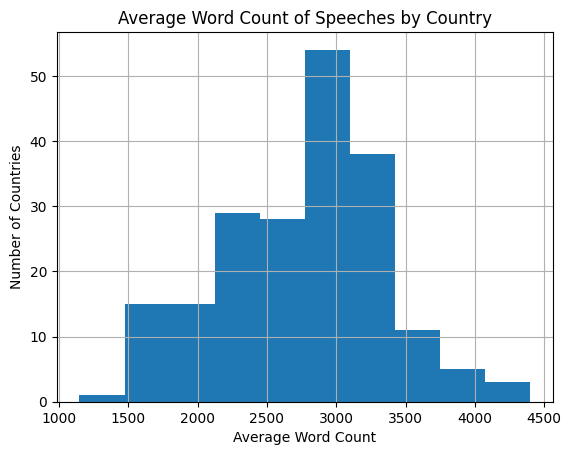

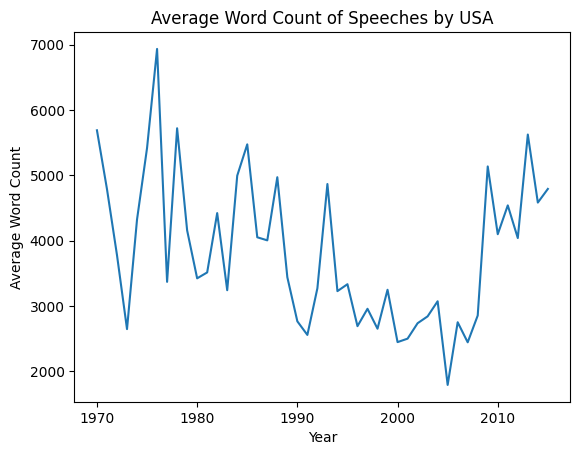

US average word count: 3832.0
Bottom 5 countries with the lowest average word count:
country
BRN    1147.0
UZB    1485.0
TON    1496.0
PLW    1518.0
LIE    1538.0
Name: wordCount, dtype: float64
Top 5 countries with the highest average word count:
country
RUS    4401.0
IRL    4284.0
CUB    4100.0
LBY    4074.0
EGY    3982.0
Name: wordCount, dtype: float64


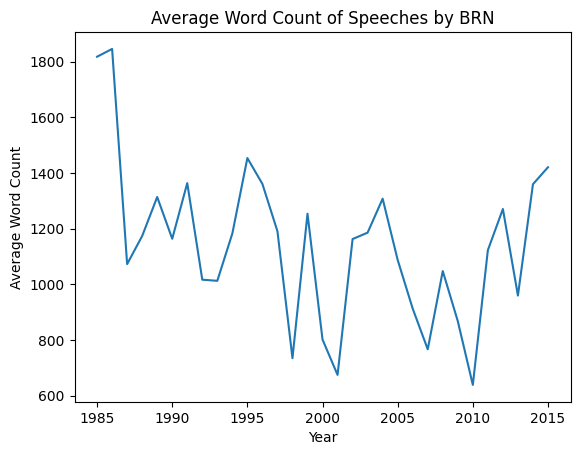

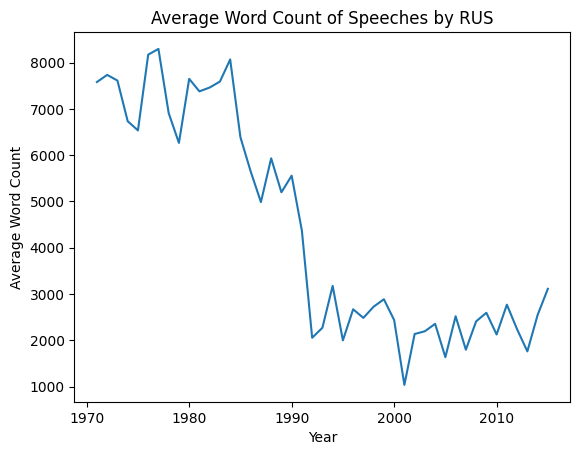

In [29]:
# What is the average word count of speeches by each country?
data['wordCount'] = data['text'].str.split().str.len()
average_word_count = data.groupby('country')['wordCount'].mean().round(0)

# Print the average word count of speeches by each country
# print(average_word_count)

# Graph a histogram of the average word count of speeches by each country
average_word_count.hist()
plt.xlabel('Average Word Count')
plt.ylabel('Number of Countries')
plt.title('Average Word Count of Speeches by Country')
plt.show()

# Graph the average word count of speeches by the US by year
us_data = data[data['country'] == 'USA']
us_data.groupby('year')['wordCount'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Average Word Count')
plt.title('Average Word Count of Speeches by USA')
plt.show()

# Print the average word count of speeches by the United States
us_word_count = data[data['country'] == 'USA']['wordCount']
print(f"US average word count: {average_word_count['USA']}")

# Save the bottom 5 countries with the lowest average word count
bottom_5_countries = average_word_count.nsmallest(5)
print("Bottom 5 countries with the lowest average word count:")
print(bottom_5_countries)

# Save the bottom 1 country with the lowest average word count
bottom_1_country = average_word_count.nsmallest(1)

# Save the top 5 countries with the highest average word count
top_5_countries = average_word_count.nlargest(5)
print("Top 5 countries with the highest average word count:")
print(top_5_countries)

# Save the top 1 country with the highest average word count
top_1_country = average_word_count.nlargest(1)

# Graph the average word count of bottom_1_country by year
bottom_1_country_data = data[data['country'] == bottom_1_country.index[0]]
bottom_1_country_data.groupby('year')['wordCount'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Average Word Count')
plt.title(f'Average Word Count of Speeches by {bottom_1_country.index[0]}')
plt.show()

# Graph the average word count of top_1_country by year
top_1_country_data = data[data['country'] == top_1_country.index[0]]
top_1_country_data.groupby('year')['wordCount'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Average Word Count')
plt.title(f'Average Word Count of Speeches by {top_1_country.index[0]}')
plt.show()

# What happened in 1990 to tank Russia's word count so much?

